# Import Libraries

In [264]:
import sklearn
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Import Data

We will use pandas to import our training data

In [265]:
df = pd.read_csv('train.csv')

We can examine the first five rows of our data

In [266]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

Transported will represent our target column and we are trying to predict whether someone was transported to the destination planet.

In [267]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<BarContainer object of 2 artists>

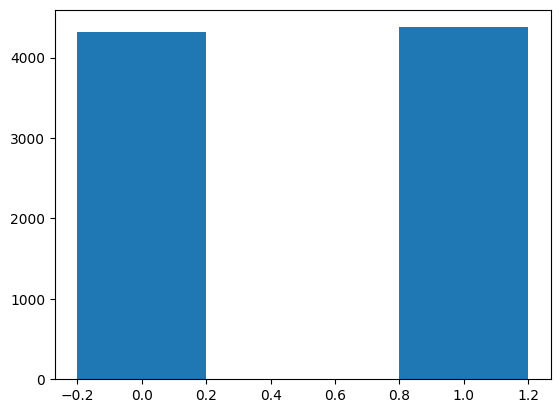

In [268]:
vals_dict  = df['Transported'].value_counts().to_dict()
import matplotlib.pyplot as plt
plt.bar(list(vals_dict.keys()), list(vals_dict.values()),
        width = 0.4)

We will convert our column to 1/0 where 1 represents True and 0 represents False. To do this we will convert the column to an integer column

In [269]:
df['Transported'] = df['Transported'].astype(int)

Let's look at a histogram of the two values.

In [270]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  Transported  
count   8505.000000  8693.000000  
mean     304.854791     0.503624  
std     1145.717189     0.500016  
min        0.000000     0.000000  
25%        0.000000     0.000000  
50%        0.000000     1.000000  
75%       46.000000     1.000000  
max    24133.000000     1.000000

We will now look to see if we have any null values

<Axes: >

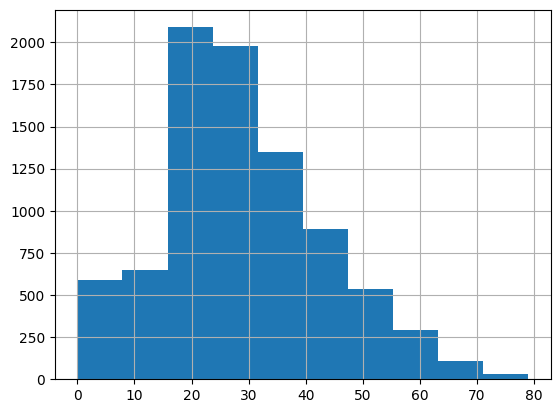

In [271]:
df['Age'].hist()

In [272]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Let us remove all the rows with null values

In [273]:
df = df.dropna()

In [274]:
df.isnull().values.any()

False

In [275]:
len(df)

6606

Encode catgeorical columns

In [276]:
one_hot_encoded = pd.get_dummies(df[['HomePlanet', 'Destination']])

In [277]:
print(one_hot_encoded)

      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                    0                  1                0   
1                    1                  0                0   
2                    0                  1                0   
3                    0                  1                0   
4                    1                  0                0   
...                ...                ...              ...   
8688                 0                  1                0   
8689                 1                  0                0   
8690                 1                  0                0   
8691                 0                  1                0   
8692                 0                  1                0   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3              

In [278]:
df = pd.concat([df, one_hot_encoded], axis=1)

In [279]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0            0                 0                  1                0   
1            1                 1                  0                0   
2            0                 0                  1                0   
3            0                 0                  1                0   
4            1                 1                  0                0   

   Destination_55 Cancri e  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  
0                        0                          0                        1  
1                        0                          0                        1  
2                        0                          0                        1  
3                        0                          0                        1  
4                        0                          0                        1

Convert CryoSleep and VIP to integer columns

In [280]:
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

In [281]:
df.head()

PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0     0001_01     Europa          0  B/0/P  TRAPPIST-1e  39.0    0   
1     0002_01      Earth          0  F/0/S  TRAPPIST-1e  24.0    0   
2     0003_01     Europa          0  A/0/S  TRAPPIST-1e  58.0    1   
3     0003_02     Europa          0  A/0/S  TRAPPIST-1e  33.0    0   
4     0004_01      Earth          0  F/1/S  TRAPPIST-1e  16.0    0   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0            0                 0                  1                0   
1            1                 1                  0                0   
2            0                 0                  1                0   
3            0                 0                  1                0   
4            1                 1                  0                0   

   Destination_55 Cancri e  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  
0                        0                          0                        1  
1                        0                          0                        1  
2                        0                          0                        1  
3                        0                          0                        1  
4                        0                          0                        1

Now let's drop the columns we will not be using.

In [282]:
df = df.drop(columns=['HomePlanet', 'Cabin', 'Name', 'PassengerId', 'Destination'])

In [283]:
df

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0             0  39.0    0          0.0        0.0           0.0     0.0   
1             0  24.0    0        109.0        9.0          25.0   549.0   
2             0  58.0    1         43.0     3576.0           0.0  6715.0   
3             0  33.0    0          0.0     1283.0         371.0  3329.0   
4             0  16.0    0        303.0       70.0         151.0   565.0   
...         ...   ...  ...          ...        ...           ...     ...   
8688          0  41.0    1          0.0     6819.0           0.0  1643.0   
8689          1  18.0    0          0.0        0.0           0.0     0.0   
8690          0  26.0    0          0.0        0.0        1872.0     1.0   
8691          0  32.0    0          0.0     1049.0           0.0   353.0   
8692          0  44.0    0        126.0     4688.0           0.0     0.0   

      VRDeck  Transported  HomePlanet_Earth  HomePlanet_Europa  \
0        0.0            0                 0                  1   
1       44.0            1                 1                  0   
2       49.0            0                 0                  1   
3      193.0            0                 0                  1   
4        2.0            1                 1                  0   
...      ...          ...               ...                ...   
8688    74.0            0                 0                  1   
8689     0.0            0                 1                  0   
8690     0.0            1                 1                  0   
8691  3235.0            0                 0                  1   
8692    12.0            1                 0                  1   

      HomePlanet_Mars  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                   0                        0                          0   
1                   0                        0                          0   
2                   0                        0                          0   
3                   0                        0                          0   
4                   0                        0                          0   
...               ...                      ...                        ...   
8688                0                        1                          0   
8689                0                        0                          1   
8690                0                        0                          0   
8691                0                        1                          0   
8692                0                        0                          0   

      Destination_TRAPPIST-1e  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  
...                       ...  
8688                        0  
8689                        0  
8690                        1  
8691                        0  
8692                        1  

[6606 rows x 15 columns]

Let us remove any outliers

In [284]:
from scipy import stats
import numpy as np
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]  # Remove rows with outliers

In [285]:
df

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0             0  39.0    0          0.0        0.0           0.0     0.0   
1             0  24.0    0        109.0        9.0          25.0   549.0   
3             0  33.0    0          0.0     1283.0         371.0  3329.0   
4             0  16.0    0        303.0       70.0         151.0   565.0   
6             0  26.0    0         42.0     1539.0           3.0     0.0   
...         ...   ...  ...          ...        ...           ...     ...   
8685          0   0.0    0          0.0        0.0           0.0     0.0   
8686          0  32.0    0          1.0     1146.0           0.0    50.0   
8690          0  26.0    0          0.0        0.0        1872.0     1.0   
8691          0  32.0    0          0.0     1049.0           0.0   353.0   
8692          0  44.0    0        126.0     4688.0           0.0     0.0   

      VRDeck  Transported  HomePlanet_Earth  HomePlanet_Europa  \
0        0.0            0                 0                  1   
1       44.0            1                 1                  0   
3      193.0            0                 0                  1   
4        2.0            1                 1                  0   
6        0.0            1                 1                  0   
...      ...          ...               ...                ...   
8685     0.0            1                 0                  1   
8686    34.0            0                 0                  1   
8690     0.0            1                 1                  0   
8691  3235.0            0                 0                  1   
8692    12.0            1                 0                  1   

      HomePlanet_Mars  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                   0                        0                          0   
1                   0                        0                          0   
3                   0                        0                          0   
4                   0                        0                          0   
6                   0                        0                          0   
...               ...                      ...                        ...   
8685                0                        0                          0   
8686                0                        0                          0   
8690                0                        0                          0   
8691                0                        1                          0   
8692                0                        0                          0   

      Destination_TRAPPIST-1e  
0                           1  
1                           1  
3                           1  
4                           1  
6                           1  
...                       ...  
8685                        1  
8686                        1  
8690                        1  
8691                        0  
8692                        1  

[5298 rows x 15 columns]

In [286]:
df['Age'] = pd.cut(df['Age'], bins=5, labels=False)

<ipython-input-286-b8ed09ee654f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.cut(df['Age'], bins=5, labels=False)


In [287]:
df

CryoSleep  Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0             0    2    0          0.0        0.0           0.0     0.0   
1             0    1    0        109.0        9.0          25.0   549.0   
3             0    2    0          0.0     1283.0         371.0  3329.0   
4             0    1    0        303.0       70.0         151.0   565.0   
6             0    1    0         42.0     1539.0           3.0     0.0   
...         ...  ...  ...          ...        ...           ...     ...   
8685          0    0    0          0.0        0.0           0.0     0.0   
8686          0    2    0          1.0     1146.0           0.0    50.0   
8690          0    1    0          0.0        0.0        1872.0     1.0   
8691          0    2    0          0.0     1049.0           0.0   353.0   
8692          0    3    0        126.0     4688.0           0.0     0.0   

      VRDeck  Transported  HomePlanet_Earth  HomePlanet_Europa  \
0        0.0            0                 0                  1   
1       44.0            1                 1                  0   
3      193.0            0                 0                  1   
4        2.0            1                 1                  0   
6        0.0            1                 1                  0   
...      ...          ...               ...                ...   
8685     0.0            1                 0                  1   
8686    34.0            0                 0                  1   
8690     0.0            1                 1                  0   
8691  3235.0            0                 0                  1   
8692    12.0            1                 0                  1   

      HomePlanet_Mars  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                   0                        0                          0   
1                   0                        0                          0   
3                   0                        0                          0   
4                   0                        0                          0   
6                   0                        0                          0   
...               ...                      ...                        ...   
8685                0                        0                          0   
8686                0                        0                          0   
8690                0                        0                          0   
8691                0                        1                          0   
8692                0                        0                          0   

      Destination_TRAPPIST-1e  
0                           1  
1                           1  
3                           1  
4                           1  
6                           1  
...                       ...  
8685                        1  
8686                        1  
8690                        1  
8691                        0  
8692                        1  

[5298 rows x 15 columns]

Transported will be our target column so we will remove this from our dataframe.

In [288]:
y = df['Transported']

In [289]:
df = df.drop(columns=['Transported'])

In [290]:
df

CryoSleep  Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0             0    2    0          0.0        0.0           0.0     0.0   
1             0    1    0        109.0        9.0          25.0   549.0   
3             0    2    0          0.0     1283.0         371.0  3329.0   
4             0    1    0        303.0       70.0         151.0   565.0   
6             0    1    0         42.0     1539.0           3.0     0.0   
...         ...  ...  ...          ...        ...           ...     ...   
8685          0    0    0          0.0        0.0           0.0     0.0   
8686          0    2    0          1.0     1146.0           0.0    50.0   
8690          0    1    0          0.0        0.0        1872.0     1.0   
8691          0    2    0          0.0     1049.0           0.0   353.0   
8692          0    3    0        126.0     4688.0           0.0     0.0   

      VRDeck  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0        0.0                 0                  1                0   
1       44.0                 1                  0                0   
3      193.0                 0                  1                0   
4        2.0                 1                  0                0   
6        0.0                 1                  0                0   
...      ...               ...                ...              ...   
8685     0.0                 0                  1                0   
8686    34.0                 0                  1                0   
8690     0.0                 1                  0                0   
8691  3235.0                 0                  1                0   
8692    12.0                 0                  1                0   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                           0                          0   
1                           0                          0   
3                           0                          0   
4                           0                          0   
6                           0                          0   
...                       ...                        ...   
8685                        0                          0   
8686                        0                          0   
8690                        0                          0   
8691                        1                          0   
8692                        0                          0   

      Destination_TRAPPIST-1e  
0                           1  
1                           1  
3                           1  
4                           1  
6                           1  
...                       ...  
8685                        1  
8686                        1  
8690                        1  
8691                        0  
8692                        1  

[5298 rows x 14 columns]

In [291]:
y

0       0
1       1
3       0
4       1
6       1
       ..
8685    1
8686    0
8690    1
8691    0
8692    1
Name: Transported, Length: 5298, dtype: int64

We will now convert ur features to a numpy array

In [292]:
X = df.values

In [293]:
X

array([[0., 2., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 2., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 2., 0., ..., 1., 0., 0.],
       [0., 3., 0., ..., 0., 0., 1.]])

In [294]:
X.shape

(5298, 14)

In [295]:
y = y.values

In [296]:
y

array([0, 1, 0, ..., 1, 0, 1])

# Train/Test Split

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [299]:
X_train.shape

(4238, 14)

In [300]:
X_test.shape

(1060, 14)

# Normalization
We will use StandardScaler to scale our values. This makes it easier for our model to converge onto the correct parameters.

In [301]:
from sklearn.preprocessing import StandardScaler

In [302]:
sc = StandardScaler()

In [303]:
X_train = sc.fit_transform(X_train)

In [304]:
X_train

array([[-0.77449919, -0.47474504,  0.        , ..., -0.52803138,
         0.        ,  0.52803138],
       [ 1.29115693, -1.47274578,  0.        , ..., -0.52803138,
         0.        ,  0.52803138],
       [-0.77449919,  1.52125643,  0.        , ...,  1.89382684,
         0.        , -1.89382684],
       ...,
       [ 1.29115693,  1.52125643,  0.        , ..., -0.52803138,
         0.        ,  0.52803138],
       [-0.77449919,  1.52125643,  0.        , ..., -0.52803138,
         0.        ,  0.52803138],
       [-0.77449919,  0.5232557 ,  0.        , ..., -0.52803138,
         0.        ,  0.52803138]])

In [305]:
X_test = sc.transform(X_test)

# Model Selection
We are now going to choose a machine learning model to make predictions on our data.

## Logistic Regression

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [307]:
model = LogisticRegression()

In [308]:
model.fit(X_train, y_train)

LogisticRegression()

In [309]:
# Make predictions on the testing data

y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [310]:
accuracy

0.7933962264150943

In [311]:
precision

0.7932404485256128

In [312]:
recall

0.7933962264150943

In [313]:
f1

0.7930616416529018

In [314]:
conf_matrix

array([[373, 119],
       [100, 468]])

## Decision Tree

In [315]:
from sklearn.tree import DecisionTreeClassifier

In [316]:
model2 = DecisionTreeClassifier()

In [317]:
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [318]:
y_pred = model2.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [319]:
accuracy

0.7660377358490567

In [320]:
precision

0.7669800254523322

In [321]:
recall

0.7660377358490567

## Random Forest

In [322]:
from sklearn.ensemble import RandomForestClassifier

In [323]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [324]:
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [325]:
y_pred = model3.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [326]:
accuracy

0.8084905660377358

# Predict on Test Data

We will now make predictions on our test.csv file. This file containes test data. Also note this csv file does not have a Transported column as this the column that we are trying to predict.We will have to transform our test data the same way we transformed our train data.

In [327]:
test_df = pd.read_csv('test.csv')

In [328]:
test_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

We dont want to remove any rows in our test data but we will see if we have any null values.

In [329]:
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [330]:
one_hot_encoded = pd.get_dummies(test_df[['HomePlanet', 'Destination']])

In [331]:
one_hot_encoded

HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                    1                  0                0   
1                    1                  0                0   
2                    0                  1                0   
3                    0                  1                0   
4                    1                  0                0   
...                ...                ...              ...   
4272                 1                  0                0   
4273                 1                  0                0   
4274                 0                  0                1   
4275                 0                  1                0   
4276                 1                  0                0   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                           0                          0   
1                           0                          0   
2                           1                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
4272                        0                          0   
4273                        0                          0   
4274                        1                          0   
4275                        0                          0   
4276                        0                          1   

      Destination_TRAPPIST-1e  
0                           1  
1                           1  
2                           0  
3                           1  
4                           1  
...                       ...  
4272                        1  
4273                        1  
4274                        0  
4275                        0  
4276                        0  

[4277 rows x 6 columns]

In [332]:
test_df = pd.concat([test_df, one_hot_encoded], axis=1)

In [333]:
test_df

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth      True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth     False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa      True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa     False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth     False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  \
0             0.0        0.0           0.0     0.0     0.0   Nelly Carsoning   
1             0.0        9.0           0.0  2823.0     0.0    Lerome Peckers   
2             0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus   
3             0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter   
4            10.0        0.0         635.0     0.0     0.0   Brence Harperez   
...           ...        ...           ...     ...     ...               ...   
4272          0.0        0.0           0.0     0.0     0.0       Jeron Peter   
4273          0.0      847.0          17.0    10.0   144.0     Matty Scheron   
4274          0.0        0.0           0.0     0.0     0.0       Jayrin Pore   
4275          0.0     2680.0           0.0     0.0   523.0    Kitakan Conale   
4276          0.0        0.0           0.0     0.0     0.0  Lilace Leonzaley   

      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                    1                  0                0   
1                    1                  0                0   
2                    0                  1                0   
3                    0                  1                0   
4                    1                  0                0   
...                ...                ...              ...   
4272                 1                  0                0   
4273                 1                  0                0   
4274                 0                  0                1   
4275                 0                  1                0   
4276                 1                  0                0   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                           0                          0   
1                           0                          0   
2                           1                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
4272                        0                          0   
4273                        0                          0   
4274                        1                          0   
4275                        0                          0   
4276                        0                          1   

      Destination_TRAPPIST-1e  
0                           1  
1                           1  
2                           0  
3                           1  
4                           1  
...                       ...  
4272                        1  
4273                        1  
4274                        0  
4275                        0  
4276                        0  

[4277 rows x 19 columns]

In [334]:
test_df["VIP"].fillna(False, inplace = True)
test_df["CryoSleep"].fillna(False, inplace = True)

In [335]:
test_df["Age"].fillna(test_df['Age'].median(), inplace=True)
test_df["RoomService"].fillna(test_df['RoomService'].median(), inplace=True)
test_df["FoodCourt"].fillna(test_df['FoodCourt'].median(), inplace=True)
test_df["ShoppingMall"].fillna(test_df['ShoppingMall'].median(), inplace=True)
test_df["Spa"].fillna(test_df['Spa'].median(), inplace=True)
test_df["VRDeck"].fillna(test_df['VRDeck'].median(), inplace=True)

In [336]:
test_df

PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0013_01      Earth       True     G/3/S    TRAPPIST-1e  27.0  False   
1        0018_01      Earth      False     F/4/S    TRAPPIST-1e  19.0  False   
2        0019_01     Europa       True     C/0/S    55 Cancri e  31.0  False   
3        0021_01     Europa      False     C/1/S    TRAPPIST-1e  38.0  False   
4        0023_01      Earth      False     F/5/S    TRAPPIST-1e  20.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
4272     9266_02      Earth       True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth      False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars       True   D/296/P    55 Cancri e  26.0  False   
4275     9273_01     Europa      False   D/297/P            NaN  26.0  False   
4276     9277_01      Earth       True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  \
0             0.0        0.0           0.0     0.0     0.0   Nelly Carsoning   
1             0.0        9.0           0.0  2823.0     0.0    Lerome Peckers   
2             0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus   
3             0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter   
4            10.0        0.0         635.0     0.0     0.0   Brence Harperez   
...           ...        ...           ...     ...     ...               ...   
4272          0.0        0.0           0.0     0.0     0.0       Jeron Peter   
4273          0.0      847.0          17.0    10.0   144.0     Matty Scheron   
4274          0.0        0.0           0.0     0.0     0.0       Jayrin Pore   
4275          0.0     2680.0           0.0     0.0   523.0    Kitakan Conale   
4276          0.0        0.0           0.0     0.0     0.0  Lilace Leonzaley   

      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                    1                  0                0   
1                    1                  0                0   
2                    0                  1                0   
3                    0                  1                0   
4                    1                  0                0   
...                ...                ...              ...   
4272                 1                  0                0   
4273                 1                  0                0   
4274                 0                  0                1   
4275                 0                  1                0   
4276                 1                  0                0   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                           0                          0   
1                           0                          0   
2                           1                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
4272                        0                          0   
4273                        0                          0   
4274                        1                          0   
4275                        0                          0   
4276                        0                          1   

      Destination_TRAPPIST-1e  
0                           1  
1                           1  
2                           0  
3                           1  
4                           1  
...                       ...  
4272                        1  
4273                        1  
4274                        0  
4275                        0  
4276                        0  

[4277 rows x 19 columns]

In [337]:
test_df["VIP"] = test_df["VIP"].astype(int)
test_df["CryoSleep"] = test_df["CryoSleep"].astype(int)

In [338]:
test_df

PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age  VIP  \
0        0013_01      Earth          1     G/3/S    TRAPPIST-1e  27.0    0   
1        0018_01      Earth          0     F/4/S    TRAPPIST-1e  19.0    0   
2        0019_01     Europa          1     C/0/S    55 Cancri e  31.0    0   
3        0021_01     Europa          0     C/1/S    TRAPPIST-1e  38.0    0   
4        0023_01      Earth          0     F/5/S    TRAPPIST-1e  20.0    0   
...          ...        ...        ...       ...            ...   ...  ...   
4272     9266_02      Earth          1  G/1496/S    TRAPPIST-1e  34.0    0   
4273     9269_01      Earth          0       NaN    TRAPPIST-1e  42.0    0   
4274     9271_01       Mars          1   D/296/P    55 Cancri e  26.0    0   
4275     9273_01     Europa          0   D/297/P            NaN  26.0    0   
4276     9277_01      Earth          1  G/1498/S  PSO J318.5-22  43.0    0   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  \
0             0.0        0.0           0.0     0.0     0.0   Nelly Carsoning   
1             0.0        9.0           0.0  2823.0     0.0    Lerome Peckers   
2             0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus   
3             0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter   
4            10.0        0.0         635.0     0.0     0.0   Brence Harperez   
...           ...        ...           ...     ...     ...               ...   
4272          0.0        0.0           0.0     0.0     0.0       Jeron Peter   
4273          0.0      847.0          17.0    10.0   144.0     Matty Scheron   
4274          0.0        0.0           0.0     0.0     0.0       Jayrin Pore   
4275          0.0     2680.0           0.0     0.0   523.0    Kitakan Conale   
4276          0.0        0.0           0.0     0.0     0.0  Lilace Leonzaley   

      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                    1                  0                0   
1                    1                  0                0   
2                    0                  1                0   
3                    0                  1                0   
4                    1                  0                0   
...                ...                ...              ...   
4272                 1                  0                0   
4273                 1                  0                0   
4274                 0                  0                1   
4275                 0                  1                0   
4276                 1                  0                0   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                           0                          0   
1                           0                          0   
2                           1                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
4272                        0                          0   
4273                        0                          0   
4274                        1                          0   
4275                        0                          0   
4276                        0                          1   

      Destination_TRAPPIST-1e  
0                           1  
1                           1  
2                           0  
3                           1  
4                           1  
...                       ...  
4272                        1  
4273                        1  
4274                        0  
4275                        0  
4276                        0  

[4277 rows x 19 columns]

In [339]:
passenger_ids = test_df['PassengerId']

In [340]:
test_df = test_df.drop(columns=['HomePlanet', 'Cabin', 'Name', 'PassengerId', 'Destination'])

In [341]:
test_df

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0             1  27.0    0          0.0        0.0           0.0     0.0   
1             0  19.0    0          0.0        9.0           0.0  2823.0   
2             1  31.0    0          0.0        0.0           0.0     0.0   
3             0  38.0    0          0.0     6652.0           0.0   181.0   
4             0  20.0    0         10.0        0.0         635.0     0.0   
...         ...   ...  ...          ...        ...           ...     ...   
4272          1  34.0    0          0.0        0.0           0.0     0.0   
4273          0  42.0    0          0.0      847.0          17.0    10.0   
4274          1  26.0    0          0.0        0.0           0.0     0.0   
4275          0  26.0    0          0.0     2680.0           0.0     0.0   
4276          1  43.0    0          0.0        0.0           0.0     0.0   

      VRDeck  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0        0.0                 1                  0                0   
1        0.0                 1                  0                0   
2        0.0                 0                  1                0   
3      585.0                 0                  1                0   
4        0.0                 1                  0                0   
...      ...               ...                ...              ...   
4272     0.0                 1                  0                0   
4273   144.0                 1                  0                0   
4274     0.0                 0                  0                1   
4275   523.0                 0                  1                0   
4276     0.0                 1                  0                0   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                           0                          0   
1                           0                          0   
2                           1                          0   
3                           0                          0   
4                           0                          0   
...                       ...                        ...   
4272                        0                          0   
4273                        0                          0   
4274                        1                          0   
4275                        0                          0   
4276                        0                          1   

      Destination_TRAPPIST-1e  
0                           1  
1                           1  
2                           0  
3                           1  
4                           1  
...                       ...  
4272                        1  
4273                        1  
4274                        0  
4275                        0  
4276                        0  

[4277 rows x 14 columns]

In [342]:
Test_X = test_df.values

In [343]:
Test_X

array([[ 1., 27.,  0., ...,  0.,  0.,  1.],
       [ 0., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 31.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 0., 26.,  0., ...,  0.,  0.,  0.],
       [ 1., 43.,  0., ...,  0.,  1.,  0.]])

In [344]:
Test_X.shape

(4277, 14)

In [345]:
Test_X = sc.transform(Test_X)
y_pred_test = model3.predict(Test_X)

In [346]:
y_pred_test

array([1, 0, 1, ..., 1, 1, 1])

# Create Submission DataFrame
We will create a dataframe similar to the sample submission file and then convert this to csv. This csv file we will upload to the competition page.

In [348]:
df_submission = pd.DataFrame({'PassengerType': passenger_ids, 'Transported': y_pred_test})

In [349]:
df_submission

PassengerType  Transported
0          0013_01            1
1          0018_01            0
2          0019_01            1
3          0021_01            1
4          0023_01            0
...            ...          ...
4272       9266_02            1
4273       9269_01            0
4274       9271_01            1
4275       9273_01            1
4276       9277_01            1

[4277 rows x 2 columns]

In [350]:
df_submission.to_csv('submission.csv', index=False)